# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

# read

In [2]:
df = pd.read_csv('./iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [5]:
X = df.drop('target', axis=1)
y = df['target']

# callbacks

In [6]:
np.random.seed(0)
tf.random.set_seed(0)

In [7]:
stopping   = EarlyStopping(monitor='val_loss', patience=10)
model_path = './saved_model_iris_sparse/{epoch:03d}_{val_loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_weights_only=True, save_best_only=True, period=1)

# model

In [8]:
model = Sequential()

model.add(Dense(units=16, input_dim=4, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy', # multi-label & not one-hot encoded
    # loss='categorical_crossentropy',      # multi-label & one-hot encoded
    optimizer='adam', 
    metrics=['accuracy']
)

# fit

In [9]:
history = model.fit(
    X, y, 
    epochs=100, 
    verbose='auto', 
    callbacks=[stopping, checkpoint], 
    validation_split=0.2, 
    shuffle=True
)

Epoch 1/100
4/4 [==============================] - 1s 78ms/step - loss: 1.2140 - accuracy: 0.4167 - val_loss: 2.0330 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1391 - accuracy: 0.4167 - val_loss: 1.8565 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 46ms/step - loss: 1.0772 - accuracy: 0.4167 - val_loss: 1.6827 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 1.0254 - accuracy: 0.4167 - val_loss: 1.5351 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9876 - accuracy: 0.4167 - val_loss: 1.4254 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9610 - accuracy: 0.4167 - val_loss: 1.3404 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.9342 - accuracy: 0.4167 - val_loss: 1.2993 - val_accuracy: 0.0

# evaluation

In [10]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']

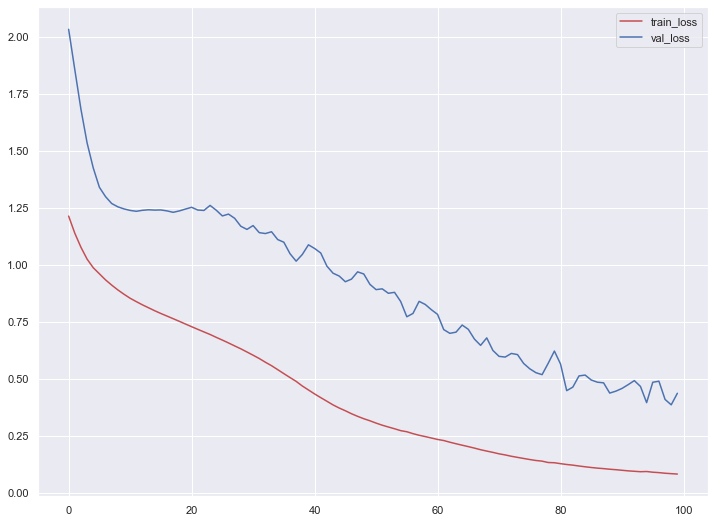

In [11]:
f = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(len(train_loss)), train_loss, c='r', label='train_loss')
plt.plot(np.arange(len(train_loss)), val_loss, c='b', label='val_loss')
plt.legend(); plt.show()

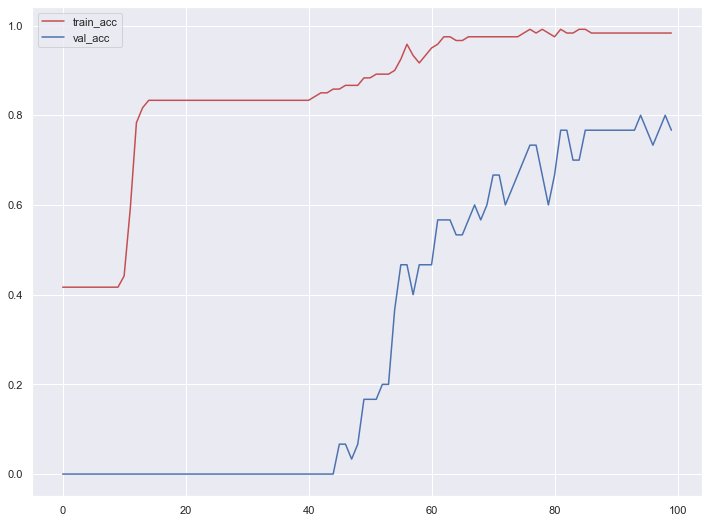

In [12]:
f = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(len(train_acc)), train_acc, c='r', label='train_acc')
plt.plot(np.arange(len(train_acc)), val_acc, c='b', label='val_acc')
plt.legend(); plt.show()